In [1]:
from statistics import mean
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')


0.9013621362136213 4.482574257425746
0.8421474193894566


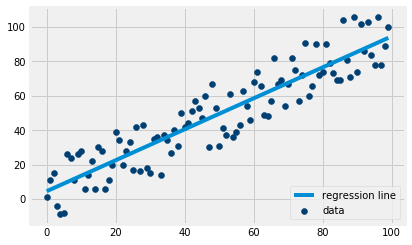

In [10]:
def squared_error(y_original, y_line):         
    return sum((y_line - y_original)**2)

def coefficient_of_determination(ys_orig, ys_line):
    ys_mean = np.array([mean(ys_orig) for _ in ys_orig], dtype = np.float64)
    square_error_reg = squared_error(ys_orig, ys_line)
    square_error_line = squared_error(ys_orig, ys_mean)
    return 1 - (square_error_reg/square_error_line)

def generate_random_seq(nos, variance,step = 1, correlation = False):  #Generate a random sequence of x and y
    val = 1
    ys = []
    for i in range(nos):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64) , np.array(ys, dtype= np.float64)

def slope_and_intercept(xs, ys):
    m = (mean(xs)*mean(ys) - mean(xs*ys))/((mean(xs))**2-mean(xs*xs)) # returns the slope
    b = mean(ys) - m*mean(xs)                                         # returns the y intercept 
    return m, b

xs, ys = generate_random_seq(100, 20, 1, correlation='pos')

m, b = slope_and_intercept(xs, ys) 
print(m , b)
line_regression = [(m*x) + b for x in xs]  
r_squared = coefficient_of_determination(ys, line_regression)
print(r_squared)


plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, line_regression, label = 'regression line')
plt.legend(loc=4)
plt.show()